In [1]:
import pandas as pd
import random

theFile = pd.read_csv("../data/full_df.csv")
theFile

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [2]:
pictures = theFile[['filename']]
pictures

,filename
0,0_right.jpg
1,1_right.jpg
2,2_right.jpg
3,4_right.jpg
4,5_right.jpg
...,...
6387,4686_left.jpg
6388,4688_left.jpg
6389,4689_left.jpg
6390,4690_left.jpg


In [3]:
target = theFile[['labels']]
target

,labels
0,['N']
1,['N']
2,['D']
3,['D']
4,['D']
...,...
6387,['D']
6388,['D']
6389,['D']
6390,['D']


In [4]:
classnames = ['[\'N\']', '[\'D\']','[\'G\']','[\'C\']','[\'A\']','[\'H\']','[\'M\']','[\'O\']']
classnames

["['N']", "['D']", "['G']", "['C']", "['A']", "['H']", "['M']", "['O']"]

In [5]:
pictures = pictures.values.tolist()




In [6]:
pictures = sum(pictures, [])
pictures

['0_right.jpg',
 '1_right.jpg',
 '2_right.jpg',
 '4_right.jpg',
 '5_right.jpg',
 '6_right.jpg',
 '7_right.jpg',
 '8_right.jpg',
 '9_right.jpg',
 '10_right.jpg',
 '11_right.jpg',
 '13_right.jpg',
 '14_right.jpg',
 '15_right.jpg',
 '16_right.jpg',
 '17_right.jpg',
 '18_right.jpg',
 '19_right.jpg',
 '21_right.jpg',
 '23_right.jpg',
 '24_right.jpg',
 '26_right.jpg',
 '27_right.jpg',
 '28_right.jpg',
 '29_right.jpg',
 '31_right.jpg',
 '32_right.jpg',
 '33_right.jpg',
 '34_right.jpg',
 '35_right.jpg',
 '37_right.jpg',
 '38_right.jpg',
 '40_right.jpg',
 '42_right.jpg',
 '43_right.jpg',
 '44_right.jpg',
 '45_right.jpg',
 '46_right.jpg',
 '47_right.jpg',
 '48_right.jpg',
 '49_right.jpg',
 '50_right.jpg',
 '51_right.jpg',
 '52_right.jpg',
 '53_right.jpg',
 '54_right.jpg',
 '55_right.jpg',
 '56_right.jpg',
 '58_right.jpg',
 '60_right.jpg',
 '61_right.jpg',
 '62_right.jpg',
 '64_right.jpg',
 '65_right.jpg',
 '66_right.jpg',
 '67_right.jpg',
 '68_right.jpg',
 '71_right.jpg',
 '72_right.jpg',
 '73_r

In [7]:
#sampling 30 photos 
small_pics= random.sample(pictures, 80)






In [8]:
#grab target if label matches 
classifications=list()
for pic_name in small_pics:
        intermediate = theFile.loc[theFile['filename'] == pic_name]
        classifications.append(intermediate['target'])
        
#classifications contains the "target" corresponding to small_pics
print(small_pics)
print(classifications)
theFile.loc[theFile['filename'] == '4596_right.jpg' ]

['1424_left.jpg', '4487_right.jpg', '4141_left.jpg', '4236_right.jpg', '4413_right.jpg', '1409_left.jpg', '1830_left.jpg', '4595_left.jpg', '2820_left.jpg', '857_left.jpg', '2335_right.jpg', '3365_right.jpg', '4172_left.jpg', '2745_right.jpg', '4439_left.jpg', '4158_left.jpg', '759_right.jpg', '263_left.jpg', '4015_left.jpg', '4186_right.jpg', '2693_left.jpg', '2481_right.jpg', '891_left.jpg', '675_right.jpg', '3372_left.jpg', '2240_right.jpg', '4449_left.jpg', '3275_right.jpg', '3382_right.jpg', '2505_left.jpg', '3207_right.jpg', '4265_left.jpg', '1431_right.jpg', '648_left.jpg', '4679_left.jpg', '591_right.jpg', '4020_right.jpg', '2614_left.jpg', '4056_right.jpg', '3284_right.jpg', '4033_left.jpg', '187_right.jpg', '975_left.jpg', '4381_right.jpg', '958_right.jpg', '1094_right.jpg', '2194_left.jpg', '1535_right.jpg', '1475_right.jpg', '3131_left.jpg', '927_left.jpg', '4300_left.jpg', '4035_left.jpg', '1261_left.jpg', '264_left.jpg', '498_left.jpg', '2782_right.jpg', '250_left.jpg', '

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
3122,4596,30,Female,4596_left.jpg,4596_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4596_right.jpg


In [9]:
import matplotlib.pyplot as plt
import cv2
actual_pics = []

for file in small_pics:
    img = plt.imread('../Challenge/images/' + file)
    #this is resizing all images
    img = cv2.resize(img, (2080, 2080))
    actual_pics.append(img)

In [10]:
actual_pics[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

(-0.5, 2079.5, 2079.5, -0.5)

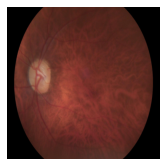

In [11]:
#lbp = local_binary_pattern(img, 12, 3)
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(actual_pics[0]); plt.axis('off')

In [12]:
import numpy as np 
from sklearn.model_selection import train_test_split
#normalize our data !!


#shuffle = false prevents data split being different everytime
X_train, X_test, y_train, y_test = train_test_split(actual_pics, classifications, test_size=0.2, shuffle = False)

#split test into validate and test, again making sure the data is always the same for consistency
##X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.25, shuffle = False)



In [13]:
len(actual_pics[2][0])

2080

In [14]:
#begin NN 

import tensorflow as tf 

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(2080, 2080, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape=(32, 32, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

model.summary()
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 2078, 2078, 32)    896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1039, 1039, 32)    0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1037, 1037, 64)    18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 518, 518, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 516, 516, 64)      36928     
_________________________________________________________________
flatten (Flatten)            (None, 17040384)          0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [16]:
print(len(X_train))
print(len(y_train))
print(len(y_test))
print(len(X_test))






64
64
16
16


In [17]:
#this stores the fitting information 
#put in our own data for the images and labelling stuff
history = model.fit(X_train, y_train, epochs = 2, validation_data = (X_test, y_test))

#dont forget to keep training until your accuracy becomes bad 

ValueError: Data cardinality is ambiguous:
  x sizes: 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2080
  y sizes: 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
Make sure all arrays contain the same number of samples.